In [ ]:
import pandas as pd
df=pd.read_csv('../DATA/02-14-2018.csv')

In [14]:
df.dropna(inplace=True)

In [15]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [16]:
col=['Timestamp', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 
'Fwd Pkts/s', 'Bwd Pkts/s', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Bwd Byts/b Avg', 
'Bwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Blk Rate Avg', 'Pkt Len Min', 'Pkt Len Max', 
'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'CWE Flag Count', 'ECE Flag Cnt', 
'URG Flag Cnt', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 
'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']


In [17]:
df=df.drop(col, axis=1)

In [18]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label'],
      dtype='object')

In [19]:
x = df.drop(columns=['Label']) 
y = df['Label'] 

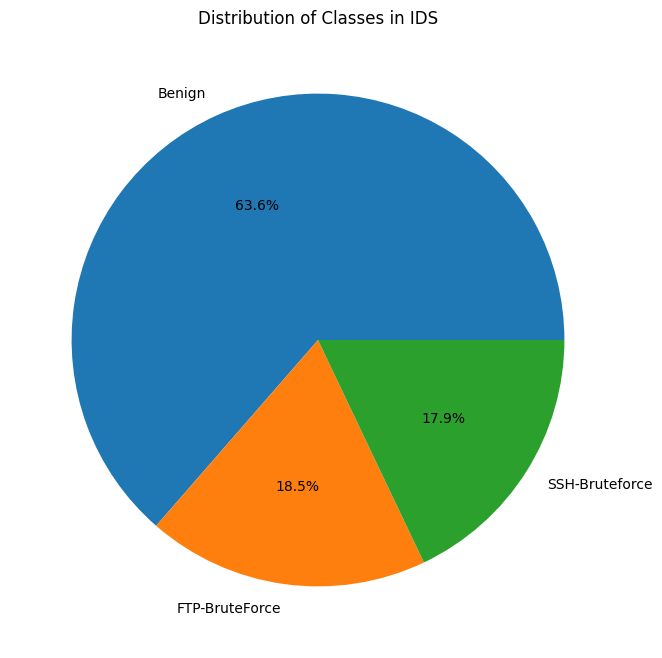

In [20]:
import matplotlib.pyplot as plt
s=y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title('Distribution of Classes in IDS')
plt.axis()  
plt.show()

In [21]:
import numpy as np
x = np.clip(x, -1e10, 1e10)

In [28]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05	)
selector.fit(x) 

VarianceThreshold(threshold=0.05)

In [30]:

f = pd.Series(selector.variances_, index=x.columns)
low = f[f < 0.05]
print("\nFeatures with variance < 0.05:")
print(low)


Features with variance < 0.05:
Fwd PSH Flags    0.025942
Bwd PSH Flags    0.000000
FIN Flag Cnt     0.003232
SYN Flag Cnt     0.025942
RST Flag Cnt     0.038115
dtype: float64


In [31]:
x[['Fwd PSH Flags', 'FIN Flag Cnt','Bwd PSH Flags','RST Flag Cnt','SYN Flag Cnt']]

,Fwd PSH Flags,FIN Flag Cnt,Bwd PSH Flags,RST Flag Cnt,SYN Flag Cnt
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1048570,0,0,0,0,0
1048571,0,0,0,0,0
1048572,0,0,0,0,0
1048573,0,0,0,0,0


In [33]:
correlation = x.corr()

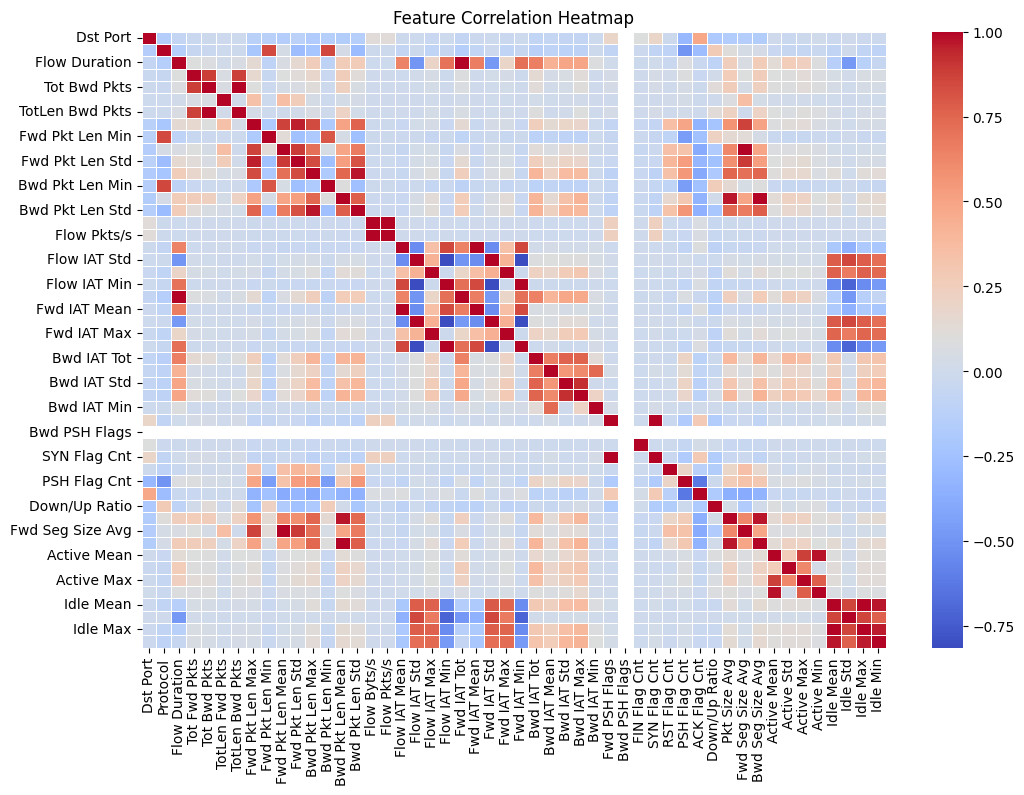

In [39]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
threshold = 0.9
features = set()

for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > threshold:
            colname = correlation.columns[i]
            features.add(colname)

print(f"\n Highly correlated features (>|{threshold}|):")
print(features)


 Highly correlated features (>|0.9|):
{'Active Min', 'Idle Max', 'Idle Min', 'Pkt Size Avg', 'SYN Flag Cnt', 'Fwd IAT Max', 'Fwd IAT Std', 'Bwd Pkt Len Std', 'Fwd IAT Min', 'Fwd IAT Tot', 'Bwd Seg Size Avg', 'Flow Pkts/s', 'TotLen Bwd Pkts', 'Bwd IAT Max', 'Fwd Pkt Len Std', 'Fwd Seg Size Avg', 'Fwd IAT Mean'}


In [42]:
x=x.drop(features, axis=1)

In [43]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(x)

score, p_values = chi2(X, y)

res = pd.DataFrame({'Feature': x.columns, 'Chi-Square Score': score, 'p-value': p_values})
res = res.sort_values(by='Chi-Square Score', ascending=False)

print("\n📊 Top Features by Chi-Square Test:")
print(res.head(10))



📊 Top Features by Chi-Square Test:
             Feature  Chi-Square Score  p-value
25      PSH Flag Cnt     103959.164056      0.0
26      ACK Flag Cnt      91271.594760      0.0
9    Bwd Pkt Len Max      57248.563046      0.0
0           Dst Port      43274.557505      0.0
17       Bwd IAT Tot      27901.476142      0.0
24      RST Flag Cnt      23776.481583      0.0
11  Bwd Pkt Len Mean      19783.198812      0.0
1           Protocol      19378.690574      0.0
10   Bwd Pkt Len Min      16539.099064      0.0
21     Fwd PSH Flags      15965.877611      0.0


In [45]:
from sklearn.feature_selection import f_classif

score1, p_values = f_classif(x, y)

res1 = pd.DataFrame({'Feature': x.columns, 'ANOVA Score': score1, 'p-value': p_values})
res1 = res1.sort_values(by='ANOVA Score', ascending=False)

print("\n📊 Top Features by ANOVA Test:")
print(res1.head(10))



📊 Top Features by ANOVA Test:
             Feature    ANOVA Score  p-value
25      PSH Flag Cnt  138955.317363      0.0
1           Protocol   76897.742818      0.0
8   Fwd Pkt Len Mean   72723.913941      0.0
26      ACK Flag Cnt   70148.511251      0.0
6    Fwd Pkt Len Max   67700.466545      0.0
9    Bwd Pkt Len Max   64012.607941      0.0
10   Bwd Pkt Len Min   63196.818054      0.0
7    Fwd Pkt Len Min   62316.057650      0.0
11  Bwd Pkt Len Mean   59810.806400      0.0
27     Down/Up Ratio   59057.717020      0.0


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


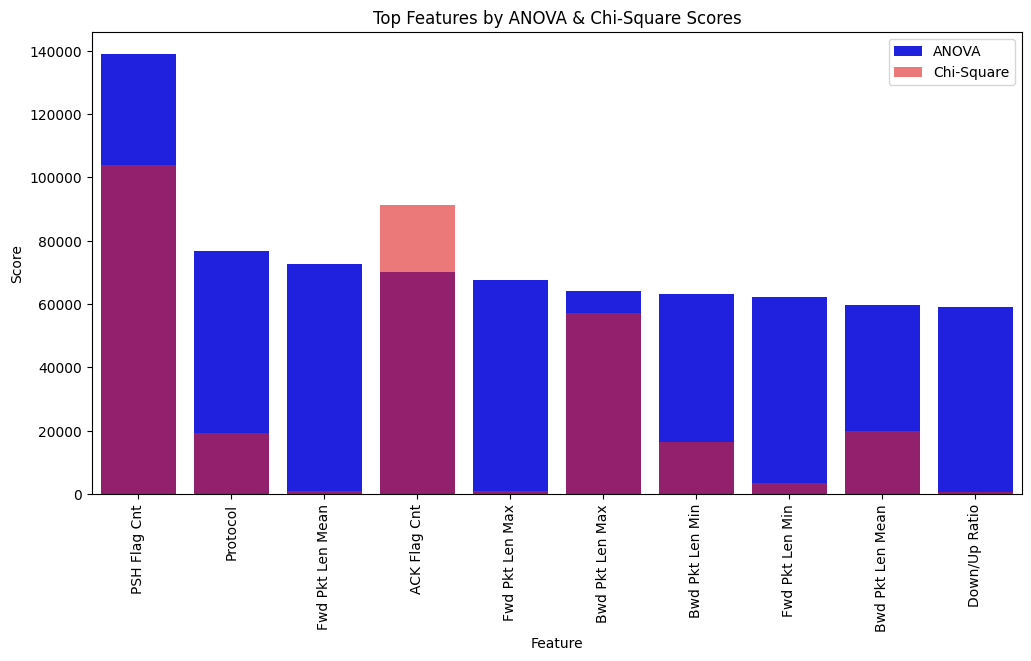

In [46]:
results = res.merge(res1, on="Feature", suffixes=("_Chi2", "_ANOVA"))
results = results.sort_values(by="ANOVA Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results.head(10), x="Feature", y="ANOVA Score", color="blue", label="ANOVA")
sns.barplot(data=results.head(10), x="Feature", y="Chi-Square Score", color="red", alpha=0.6, label="Chi-Square")

plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title("Top Features by ANOVA & Chi-Square Scores")
plt.legend()
plt.show()


In [47]:
s = pd.DataFrame({
    'Feature': x.columns,
    'ANOVA': score1,
    'Chi-Square': score
})

In [50]:
thres = 10000
thres1 = 5000
selected_features = s[(s['ANOVA'] >= thres) | (s['Chi-Square'] >= thres1)]['Feature'].values

In [56]:
x[selected_features].shape[1]

17